In [2]:
import numpy as np 
file_path = "C:/Users/leifo/Downloads/Assignment1/data/corpus.txt" 

# Base Model

In [3]:
import numpy as np
from collections import defaultdict, Counter
import pickle

class BigramLM:
    def __init__(self):
        self.vocab = set()  
        self.unigram_counts = Counter()
        self.bigram_counts = defaultdict(Counter)
        self.total_tokens = 0
        self.bigram_probabilities = {} 

    def preprocess(self, text):
        text = text.replace('.', ' ').replace(',', ' ').replace('?', ' ').replace('!', ' ')
        text = text.lower()
        return text

    def tokenize(self, text):
        tokens = ['$'] + text.split()
        return tokens
    
    def calculate_probability(self):
        for word1 in self.bigram_counts:
            for word2 in self.bigram_counts[word1]:
                count_word1_word2 = self.bigram_counts[word1][word2]
                count_word1 = self.unigram_counts[word1]
                probability = (count_word1_word2) / (count_word1) if count_word1 > 0 else 0
                self.bigram_probabilities[(word1, word2)] = probability

    def train(self, filepath):
        with open(filepath, 'r') as file:
            for line in file:
                preprocessed_line = self.preprocess(line)
                tokens = self.tokenize(preprocessed_line)
                self.vocab.update(tokens)
                self.total_tokens += len(tokens)
                self.unigram_counts.update(tokens)
                for i in range(len(tokens) - 1):
                    self.bigram_counts[tokens[i]][tokens[i + 1]] += 1
        self.calculate_probability()

    def save_model(self, filepath):
        with open(filepath, 'wb') as file:
            pickle.dump(self, file)

    @staticmethod
    def load_model(filepath):
        with open(filepath, 'rb') as file:
            return pickle.load(file)

bigram_basic = BigramLM()
bigram_basic.train(file_path)

bigram_basic.save_model('base_model.pkl')

base_model = BigramLM.load_model('base_model.pkl')

# Laplace Smoothing

In [4]:
import numpy as np
from collections import defaultdict, Counter
import pickle

class BigramLM:
    def __init__(self):
        self.vocab = set()  
        self.unigram_counts = Counter()
        self.bigram_counts = defaultdict(Counter)
        self.total_tokens = 0
        self.bigram_probabilities = {} 

    def preprocess(self, text):
        text = text.replace('.', ' ').replace(',', ' ').replace('?', ' ').replace('!', ' ')
        text = text.lower()
        return text

    def tokenize(self, text):
        tokens = ['$'] + text.split()
        return tokens

    def train(self, filepath):
        with open(filepath, 'r') as file:
            for line in file:
                preprocessed_line = self.preprocess(line)
                tokens = self.tokenize(preprocessed_line)
                self.vocab.update(tokens)
                self.total_tokens += len(tokens)
                self.unigram_counts.update(tokens)
                for i in range(len(tokens) - 1):
                    self.bigram_counts[tokens[i]][tokens[i + 1]] += 1
        self.calculate_bigram_probabilities()

    def calculate_bigram_probabilities(self):
        vocab_size = len(self.vocab)
        for word1 in self.bigram_counts:
            for word2 in self.bigram_counts[word1]:
                count_word1_word2 = self.bigram_counts[word1][word2]
                count_word1 = self.unigram_counts[word1]
                probability = (count_word1_word2 + 1) / (count_word1 + vocab_size)
                self.bigram_probabilities[(word1, word2)] = probability

    def get_probability(self, word1, word2):
        vocab_size = len(self.vocab)
        return self.bigram_probabilities.get((word1, word2), 1 / (self.unigram_counts[word1] + vocab_size))

    def save_model(self, filepath):
        with open(filepath, 'wb') as file:
            pickle.dump(self, file)

    @staticmethod
    def load_model(filepath):
        with open(filepath, 'rb') as file:
            return pickle.load(file)

bigram_lm = BigramLM()
bigram_lm.train(file_path)

bigram_lm.save_model('lm_model.pkl')

lm_model = BigramLM.load_model('lm_model.pkl')

print("Bigram Probability Laplace:", lm_model.bigram_probabilities)


Bigram Probability Laplace: {('$', 'i'): 0.2693486590038314, ('$', 'ill'): 0.0010217113665389529, ('$', 'im'): 0.027203065134099615, ('$', 'ive'): 0.00561941251596424, ('$', 'during'): 0.0002554278416347382, ('$', 'id'): 0.0011494252873563218, ('$', 'the'): 0.0005108556832694764, ('$', 'on'): 0.0002554278416347382, ('$', 'is'): 0.0002554278416347382, ('$', 'no'): 0.0002554278416347382, ('$', 'a'): 0.0005108556832694764, ('$', 'in'): 0.0002554278416347382, ('$', 'when'): 0.0011494252873563218, ('$', 'heated'): 0.0002554278416347382, ('$', 'this'): 0.0002554278416347382, ('$', 'occured'): 0.0002554278416347382, ('i', 'stand'): 0.0003254149040026033, ('i', 'feel'): 0.11042412409155006, ('i', 'literally'): 0.00021694326933506888, ('i', 'just'): 0.006508298080052067, ('i', 'really'): 0.0037965072133637054, ('i', 'believed'): 0.00021694326933506888, ('i', 'wanted'): 0.0014101312506779478, ('i', 'ranted'): 0.00021694326933506888, ('i', 'mention'): 0.0003254149040026033, ('i', 'was'): 0.021911

# Kneser-ney Model

In [6]:
import numpy as np
from collections import defaultdict, Counter
import pickle

class BigramLM:
    def __init__(self):
        self.vocab = set()
        self.unigram_counts = Counter()
        self.bigram_counts = defaultdict(Counter)
        self.total_tokens = 0
        self.continuation_counts = Counter()
        self.bigram_context_counts = Counter()
        self.bigram_probabilities = {} 

    def preprocess(self, text):
        text = text.replace('.', ' ').replace(',', ' ').replace('?', ' ').replace('!', ' ')
        text = text.lower()
        return text

    def tokenize(self, text):
        tokens = ['$'] + text.split()
        return tokens

    def train(self, filepath):
        with open(filepath, 'r', encoding='utf-8') as file:
            for line in file:
                preprocessed_line = self.preprocess(line)
                tokens = self.tokenize(preprocessed_line)
                self.vocab.update(tokens)
                self.total_tokens += len(tokens)
                self.unigram_counts.update(tokens)
                previous_word = None
                for word in tokens:
                    if previous_word is not None:
                        self.bigram_counts[previous_word][word] += 1
                        self.bigram_context_counts[previous_word] += 1
                        self.continuation_counts[word] += 1
                    previous_word = word
        self.calculate_bigram_probabilities()

    def calculate_continuation_counts(self):
        for word1 in self.bigram_counts:
            for word2 in self.bigram_counts[word1]:
                self.continuation_counts[word2] += 1

    def calculate_bigram_probabilities(self):
        vocab_size = len(self.vocab)
        discount = 0.75  
        for word1 in self.bigram_counts:
            for word2 in self.bigram_counts[word1]:
                bigram_count = self.bigram_counts[word1][word2]
                word1_count = self.unigram_counts[word1]
                continuation_probability = self.continuation_counts[word2] / self.total_tokens
                lambda_weight = discount * len(self.bigram_counts[word1]) / word1_count
                bigram_probability = max(bigram_count - discount, 0) / word1_count
                bigram_probability += lambda_weight * continuation_probability
                self.bigram_probabilities[(word1, word2)] = bigram_probability

    def get_probability(self, word1, word2):
        return self.bigram_probabilities.get((word1, word2), 0)

    def save_model(self, filepath):
        with open(filepath, 'wb') as file:
            pickle.dump(self, file)

    @staticmethod
    def load_model(filepath):
        with open(filepath, 'rb') as file:
            return pickle.load(file)

bigram_kn = BigramLM()
bigram_kn.train(file_path)

bigram_kn.save_model('kn_model.pkl')

kn_model = BigramLM.load_model('kn_model.pkl')

print("Bigram Probability Kneser-ney:", kn_model.bigram_probabilities)


Bigram Probability Kneser-ney: {('$', 'i'): 0.8784080032834682, ('$', 'ill'): 0.002606516866944603, ('$', 'im'): 0.08806221729474918, ('$', 'ive'): 0.017613363102536854, ('$', 'during'): 0.00010518849287446525, ('$', 'id'): 0.003023898811956729, ('$', 'the'): 0.0010679872067358783, ('$', 'on'): 0.00012828176517071311, ('$', 'is'): 0.00013788693152401975, ('$', 'no'): 0.00011152381536281643, ('$', 'a'): 0.0010310992806343497, ('$', 'in'): 0.00015617762064361427, ('$', 'when'): 0.003044130970871141, ('$', 'heated'): 0.00010426884928744653, ('$', 'this'): 0.000135536731246083, ('$', 'occured'): 0.00010426884928744653, ('i', 'stand'): 0.0003477013802361325, ('i', 'feel'): 0.27112431108849233, ('i', 'literally'): 7.310008231350817e-05, ('i', 'just'): 0.015775707567049976, ('i', 'really'): 0.009054847272768774, ('i', 'believed'): 6.954027604722652e-05, ('i', 'wanted'): 0.0030047192028053345, ('i', 'ranted'): 6.776037291408568e-05, ('i', 'mention'): 0.0003459214771029917, ('i', 'was'): 0.0534

# Top 5 Bigrams

In [7]:
# Top 5 bigrams before smoothing
top_bigrams_before = sorted(base_model.bigram_probabilities.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 Bigrams Before Smoothing:")
for bigram, probability in top_bigrams_before:
    print(f"{bigram}: {probability}")

# Top 5 bigrams after Laplace smoothing
top_bigrams_after = sorted(lm_model.bigram_probabilities.items(), key=lambda item: item[1], reverse=True)[:5]
print("\nTop 5 Bigrams After Laplace Smoothing:")
for bigram, probability in top_bigrams_after:
    print(f"{bigram}: {probability}")

# Top 5 bigrams after Kneser-ney smoothing
top_bigrams_after = sorted(kn_model.bigram_probabilities.items(), key=lambda item: item[1], reverse=True)[:5]
print("\nTop 5 Bigrams After Kneser-ney Smoothing:")
for bigram, probability in top_bigrams_after:
    print(f"{bigram}: {probability}")

Top 5 Bigrams Before Smoothing:
('href', 'http'): 1.0
('tychelle', 'to'): 1.0
('hang', 'out'): 1.0
('nonexistent', 'social'): 1.0
('alex', 'and'): 1.0

Top 5 Bigrams After Laplace Smoothing:
('$', 'i'): 0.2693486590038314
('i', 'feel'): 0.11042412409155006
('feel', 'like'): 0.035092684307343996
('i', 'am'): 0.03189066059225513
('$', 'im'): 0.027203065134099615

Top 5 Bigrams After Kneser-ney Smoothing:
('don', 't'): 0.9704096449309799
('href', 'http'): 0.9700183928717403
('didn', 't'): 0.9584491403035506
('sort', 'of'): 0.956559463072403
('supposed', 'to'): 0.9189487451974168


# Laplace vs Kneser-ney in terms of Bigram probabilities

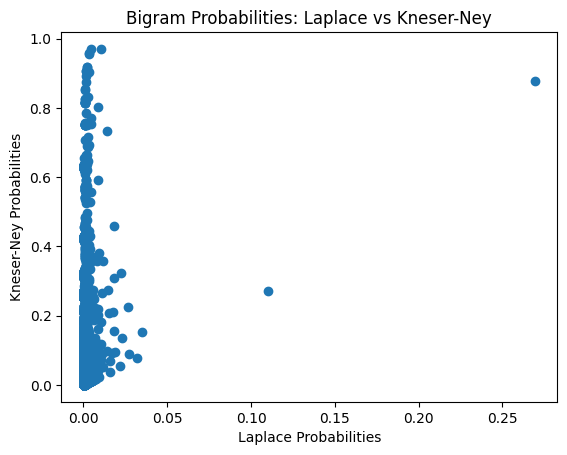

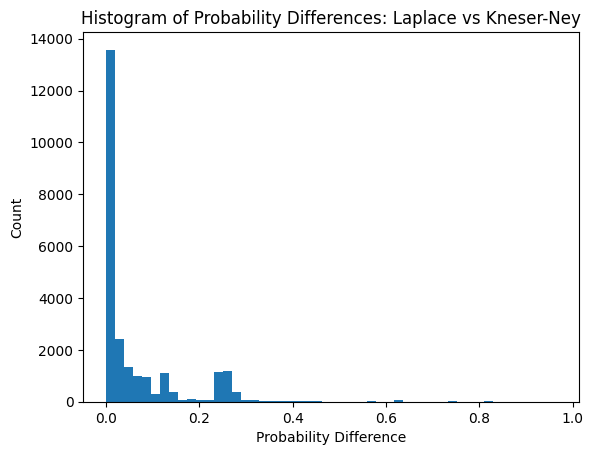

Mean difference: 0.06133464363264348
Median difference: 0.012299445933502687
Standard deviation of differences: 0.10030267460649167


In [31]:
import matplotlib.pyplot as plt

kneser_ney_probs = kn_model.bigram_probabilities
laplace_probs = lm_model.bigram_probabilities

differences = {}
for bigram in kneser_ney_probs:
    kn_prob = kneser_ney_probs.get(bigram, 0)
    lp_prob = laplace_probs.get(bigram, 0)
    differences[bigram] = kn_prob - lp_prob

# Scatter Plot of bigram probabilities
plt.scatter(laplace_probs.values(), kneser_ney_probs.values())
plt.xlabel('Laplace Probabilities')
plt.ylabel('Kneser-Ney Probabilities')
plt.title('Bigram Probabilities: Laplace vs Kneser-Ney')
plt.show()

# Histogram of probability differences
plt.hist(differences.values(), bins=50)
plt.xlabel('Probability Difference')
plt.ylabel('Count')
plt.title('Histogram of Probability Differences: Laplace vs Kneser-Ney')
plt.show()

# Statistical Analysis
mean_difference = np.mean(list(differences.values()))
median_difference = np.median(list(differences.values()))
std_deviation = np.std(list(differences.values()))

print(f"Mean difference: {mean_difference}")
print(f"Median difference: {median_difference}")
print(f"Standard deviation of differences: {std_deviation}")


# Scatter Plot Inference:

- Many bigrams have low Laplace probabilities (clustered near the origin), but higher Kneser-Ney probabilities. This suggests Kneser-Ney gives more weight to less frequent bigrams compared to Laplace.
- There's a group of bigrams with higher probabilities in both models, likely common bigrams.
- Some bigrams have high Kneser-Ney probabilities but low Laplace probabilities, indicating Kneser-Ney may better handle less common combinations by leveraging context.
- No bigrams have high Laplace probabilities and low Kneser-Ney probabilities, which may indicate that Kneser-Ney doesn't drastically underweight any bigrams that Laplace finds important.
- The spread of points along the y-axis at low x-values (Laplace probabilities) implies that Kneser-Ney differentiates more between bigrams that Laplace considers equally unlikely.

# Histogram Inference:

- The majority of bigram probability differences are close to 0, indicating that for many bigrams, the probabilities estimated by the Laplace and Kneser-Ney models are similar.
- A smaller number of bigrams have a more considerable difference in probabilities, suggesting some bigrams are estimated quite differently between the two models.
- The mean difference is greater than the median difference, hinting at a right-skew in the distribution of probability differences. This suggests there are more bigrams where Kneser-Ney gives a notably higher probability than Laplace compared to the reverse.
- The standard deviation is relatively small, which indicates that while there are differences, they aren't extremely large for most bigrams.

# Unigram Level

In [34]:
from utils import emotion_scores

def generate_text_with_emotion(bigram_model, min_size, target_emotion):
    while True:
        text = ['$']
        for _ in range(min_size):  
            possible_words = list(bigram_model.bigram_counts[text[-1]].keys())
            if not possible_words:
                break  

            probabilities = []
            for word in possible_words:
                word_probability = bigram_model.get_probability(text[-1], word)
                word_emotions = emotion_scores(word)
                emotion_score = next((e['score'] for e in word_emotions if e['label'] == target_emotion), 0)
                adjusted_probability = word_probability + emotion_score
                probabilities.append((word, adjusted_probability))

            total_prob = sum(prob for _, prob in probabilities)
            normalized_probs = [(word, prob / total_prob) for word, prob in probabilities]

            next_word = np.random.choice([word for word, _ in normalized_probs], p=[prob for _, prob in normalized_probs])
            text.append(next_word)

        generated_text = ' '.join(text[1:])
        if len(generated_text.split()) >= min_size:
            break

    generated_text_emotion_scores = emotion_scores(generated_text)
    return generated_text, generated_text_emotion_scores

def write_generated_texts_to_file(bigram_lm, sample_size, target_emotion, num_samples, file_name):
    with open(file_name, 'w') as file:
        for i in range(num_samples):
            generated_text, generated_text_emotion_scores = generate_text_with_emotion(bigram_lm,sample_size, target_emotion)
            file.write(f"{generated_text}\n")

kn_model = BigramLM.load_model('kn_model.pkl')
min_sample_size = 10
target_emotion = 'love'

generated_text, emotion_scores_for_text = generate_text_with_emotion(kn_model, min_sample_size, target_emotion)
print(f"Generated text: {generated_text}")
print("Emotion scores for the generated text:")
for emotion in emotion_scores_for_text:
    print(f"{emotion['label']}: {emotion['score']}")


Generated text: the sharing it warms my sweet treat me when i
Emotion scores for the generated text:
sadness: 0.0014256066642701626
joy: 0.4042743742465973
love: 0.5923001170158386
anger: 0.000911857932806015
fear: 0.0004927276750095189
surprise: 0.0005953522049821913


# Bigram Level

In [33]:
def generate_text_with_emotion(bigram_model, min_size, target_emotion):
    while True:
        text = ['$']
        for _ in range(min_size): 
            possible_bigrams = [(text[-1], word) for word in bigram_model.bigram_counts[text[-1]].keys()]
            if not possible_bigrams:
                break 

            probabilities = []
            for bigram in possible_bigrams:
                word1, word2 = bigram
                bigram_probability = bigram_model.get_probability(word1, word2)
                bigram_emotions = emotion_scores(f"{word1} {word2}")
                emotion_score = next((e['score'] for e in bigram_emotions if e['label'] == target_emotion), 0)
                adjusted_probability = bigram_probability  + emotion_score
                probabilities.append((word2, adjusted_probability))

            total_prob = sum(prob for _, prob in probabilities)
            normalized_probs = [(word, prob / total_prob) for word, prob in probabilities]

            next_word = np.random.choice([word for word, _ in normalized_probs], p=[prob for _, prob in normalized_probs])
            text.append(next_word)

        generated_text = ' '.join(text[1:])  
        if len(generated_text.split()) >= min_size:
            break

    generated_text_emotion_scores = emotion_scores(generated_text) 
    return generated_text, generated_text_emotion_scores


kn_model = BigramLM.load_model('kn_model.pkl')
min_sample_size = 10
target_emotion = 'love'

generated_text, emotion_scores_for_text = generate_text_with_emotion(kn_model, min_sample_size, target_emotion)
print(f"Generated text: {generated_text}")
print("Emotion scores for the generated text:")
for emotion in emotion_scores_for_text:
    print(f"{emotion['label']}: {emotion['score']}")


Generated text: i expected the gentle rippling through loving relationship feeling supportive
Emotion scores for the generated text:
sadness: 0.0008684539934620261
joy: 0.0019099011551588774
love: 0.995537519454956
anger: 0.00037643633550032973
fear: 0.0005965686868876219
surprise: 0.0007110799197107553


# Sample Level

In [34]:
def generate_text_with_emotion(bigram_model, min_size, target_emotion):
    text = ['$']
    while True:
        next_word = generate_next_word(bigram_model, text[-1])
        if next_word: 
            text.append(next_word)
        else:
            break
        
        if text[-1] == '$' and len(text) > min_size + 1:
            break

    generated_text = ' '.join(text[1:]) 
    generated_text_emotion_scores = emotion_scores(generated_text)
    return generated_text, generated_text_emotion_scores

def generate_next_word(bigram_model, last_word):
    possible_words = list(bigram_model.bigram_counts[last_word].keys())
    if not possible_words:
        return None  

    probabilities = [bigram_model.get_probability(last_word, word) for word in possible_words]
    total_prob = sum(probabilities)
    normalized_probs = [prob / total_prob for prob in probabilities]

    return np.random.choice(possible_words, p=normalized_probs)

kn_model = BigramLM.load_model('kn_model.pkl')
target_emotion = 'love'
min_sample_size = 10

generated_text, emotion_scores_for_text = generate_text_with_emotion(kn_model, min_sample_size, target_emotion)
print(f"Generated text: {generated_text}")
print("Emotion scores for the generated text:")
for emotion in emotion_scores_for_text:
    print(f"{emotion['label']}: {emotion['score']}")


Generated text: im afraid of not many years and you keep three seconds
Emotion scores for the generated text:
sadness: 0.0007728695054538548
joy: 0.0005228818627074361
love: 0.00018404204456601292
anger: 0.002507090335711837
fear: 0.9956476092338562
surprise: 0.00036543302121572196
